In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sc

In [3]:
df=pd.read_excel('Advertising.xlsx')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1.0,230.1,37.8,69.2,22.1
1,2.0,44.5,39.3,45.1,10.4
2,3.0,17.2,45.9,69.3,9.3
3,4.0,151.5,41.3,58.5,18.5
4,5.0,180.8,10.8,58.4,12.9


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [7]:
df.shape

(200, 4)

In [9]:
Xs = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)
#x_train, x_test, y_train, y_test = train_test_split(Xs,y,test_size = 0.3) #Train is 70% and Test is 30% 
x_train, x_test, y_train, y_test = train_test_split(Xs,y,test_size=0.3) # default split is 75% for training and 25% for testing
# 200 records : 75% train = 150 and 25% test = 50
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
reg = LinearRegression()
reg.fit(x_train, y_train)


(140, 3)
(60, 3)
(140, 1)
(60, 1)


LinearRegression()

In [10]:
print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)


Slope:  [[ 0.04884428  0.17438569 -0.00209896]]
Intercept:  [3.01084114]


In [11]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 3.0108 + 0.048844*TV + 0.17439*radio + -0.002099*newspaper


In [12]:
y_pred = reg.predict(x_test)

In [13]:
def myfunc(TV,radio,newspaper):
  Y = 2.877 + 0.046565*TV + 0.17916*radio + 0.0034505*newspaper
  return Y
predictedsales = myfunc(39.5,41.1,10.8)
print("Predicted Sales is ", predictedsales)

Predicted Sales is  12.117058900000002


In [15]:
print(reg.predict([[39.5,41.1,10.8]]))

[[12.0847731]]


C:\Users\shashank adiga\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
from sklearn.metrics import mean_absolute_error 
predictions = reg.predict(x_test)
mae = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  1.5977037147350661


In [17]:
from sklearn.metrics import mean_squared_error
predictions = reg.predict(x_test)
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error = ",mse)

Mean Squared Error =  4.875010899448994


In [19]:
import numpy as np
predictions = reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  2.2079426848197383


In [20]:
reg.score(Xs,y)

0.8921411199012791

C:\Users\shashank adiga\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


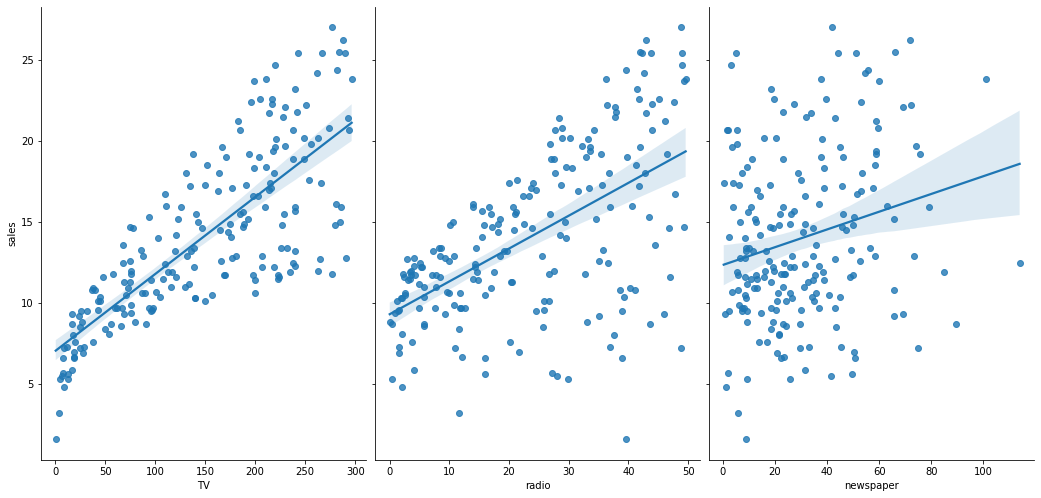

In [21]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',size=7,aspect=0.7,kind='reg')

In [26]:
#create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
Y = df.sales

# split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# fit the model to the training data (learn the coefficients)
reg.fit(X_train, Y_train)

print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)

print("The linear model is: Y = 3.026 + 0.04547*TV + 0.1868*radio")

# make predictions on the testing set
Y_pred = reg.predict(X_test)



Slope:  [0.04529882 0.17921471]
Intercept:  3.159291205349149
The linear model is: Y = 3.026 + 0.04547*TV + 0.1868*radio


C:\Users\shashank adiga\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


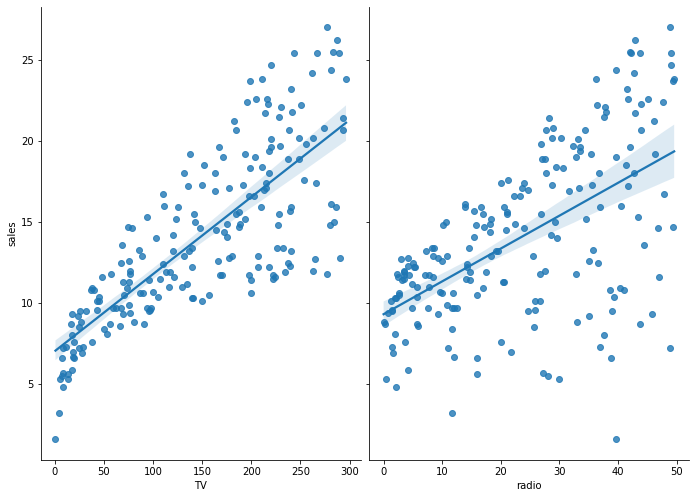

In [27]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(df, x_vars=['TV', 'radio'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [28]:

from sklearn.metrics import mean_absolute_error,  mean_squared_error
predictions = reg.predict(X_test)
mae = mean_absolute_error(Y_test,predictions)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  1.3378195444125731


In [29]:
predictions = reg.predict(X_test)
mae = mean_squared_error(Y_test,predictions)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  2.5862838994761854


In [31]:
# compute the RMSE of our predictions
rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  1.6081927432606409


In [32]:
reg.score(X, y)

0.896452794965637